In [1]:
import torch
from torch import nn
from torch import Tensor
from torch import optim
import torch.nn.functional as F
from api import api_key

In [2]:
# see what torch version i have
print(torch.__version__)

2.0.1+cu118


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
from financetoolkit import Toolkit
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
companies = Toolkit(['AAPL', 'MSFT', 'GOOG', 'TSM', 'V', 'LVMUY', 'AMZN', 'NVDA','ADBE', 'NFLX', 'WMT', 'MA', 'KO', 'NKE', 'INTC', 'IBM', 'QCOM', 'CSCO', 'TXN', 'EBAY', 'NDAQ', 'SMCI', 'JPM', 'HD', 'PEP', 'COST', 'F', 'BA', 'BAC', 'XOM', 'CVX', 'PG', 'VZ', 'JNJ', 'DIS', 'GE', 'PFE', 'MRK', 'UNH', 'CAT', 'MMM', 'HON', 'DD', 'AXP', 'MCD', 'TRV', 'GS', 'PRU', 'ALL', 'BMY', 'BSX', 'C', 'CL', 'ADSK', 'CHKP', 'AMAT', 'CTSH', 'EXPE', 'FAST', 'GILD', 'HSIC', 'IDXX', 'INCY'], api_key=api_key, start_date="2010-01-01")

historical_data = companies.get_historical_data()
historical_data.tail()

Open                                                        \
                 AAPL       MSFT       GOOG       TSM          V      LVMUY   
Date                                                                          
2023-08-28 180.089996 325.660004 132.080002     93.82 243.009995 172.009995   
2023-08-29 179.699997 321.880005 132.998001 93.769997      243.5 172.869995   
2023-08-30 184.940002 328.670013 135.570007 95.449997 246.419998 175.979996   
2023-08-31 187.839996 329.200012 137.050003 93.339996 245.589996 171.860001   
2023-09-01 189.490005 331.309998 138.429993 94.300003 247.470001 171.399994   

                                                        ... Cumulative Return  \
                 AMZN       NVDA       ADBE       NFLX  ...              ADSK   
Date                                                    ...                     
2023-08-28 133.779999 464.820007 525.700012 418.040009  ... 8.456953486560224   
2023-08-29 133.380005 466.660004 527.700012      416.0  ...  8.54694172185434   
2023-08-30 134.929993 490.440002 540.099976 430.850006  ... 8.630697428905373   
2023-08-31 135.059998 493.799988      547.0 431.230011  ... 8.645890222049122   
2023-09-01 139.460007 497.619995 564.799988 437.730011  ...  8.57109481885473   

                                                                     \
                         CHKP               AMAT               CTSH   
Date                                                                  
2023-08-28 3.9205509258120417 12.927819348346068  3.283056652994068   
2023-08-29  3.949281824999057 13.333202591253412 3.3193180633239248   
2023-08-30 3.9334504270462984 13.419435556926503  3.323501891616071   
2023-08-31 3.9457634727128763 13.580344149188123 3.3290807167476593   
2023-09-01 3.9032540339122144  13.68969188193021 3.3346594953902002   

                                                                    \
                         EXPE              FAST               GILD   
Date                                                                 
2023-08-28  3.180354692613864 7.741062873685497  4.697730613202616   
2023-08-29 3.2326892426477642 7.769418279331759  4.769074530007417   
2023-08-30  3.200641780711689 7.801824341476302 4.7355370388979825   
2023-08-31  3.186823040821929 7.774819469724362  4.663583161050685   
2023-09-01  3.221516780186138 7.734311149398571  4.673949327926953   

                                                                     
                         HSIC               IDXX               INCY  
Date                                                                 
2023-08-28 3.7221502355134586 18.235205945443557 6.8242107368420815  
2023-08-29  3.738377264634237  18.91604922647746  6.798946947368398  
2023-08-30 3.6987645935353535  18.89090159427138  6.868421052631555  
2023-08-31 3.6529476862962653 18.913091164456677  6.792631473684187  
2023-09-01  3.643879604114775  18.90865347970955 6.8094738947368185  

[5 rows x 756 columns]

In [6]:
historical_data.head()

Open                                                       \
               AAPL      MSFT      GOOG   TSM         V     LVMUY   AMZN   
Date                                                                       
2010-01-04   7.6225 30.620001  15.61522 11.49      22.0 22.610001 6.8125   
2010-01-05 7.664286     30.85 15.620949  11.6 21.825001 22.540001 6.6715   
2010-01-06 7.656429 30.879999 15.588072 11.56 21.752501 22.370001   6.73   
2010-01-07   7.5625 30.629999 15.178109 11.41   21.4925 22.780001 6.6005   
2010-01-08 7.510714 30.280001 14.744733 11.14    21.705 23.219999  6.528   

                                      ...  Cumulative Return  \
             NVDA      ADBE     NFLX  ...               ADSK   
Date                                  ...                      
2010-01-04 4.6275 36.650002 7.931429  ...                1.0   
2010-01-05  4.605 37.040001 7.652857  ... 0.9848072068562523   
2010-01-06 4.6875 37.330002 7.361429  ... 0.9871445266848461   
2010-01-07  4.695     37.41 7.731429  ... 0.9925983638488508   
2010-01-08   4.59     36.75 7.498571  ... 1.0229840280483056   

                                                                     \
                         CHKP               AMAT               CTSH   
Date                                                                  
2010-01-04                1.0                1.0                1.0   
2010-01-05 0.9914980653328038 0.9923074939925911 1.0113247783878743   
2010-01-06 0.9967751100329785  0.990209723690305 1.0113247783878743   
2010-01-07 0.9944296981990708  0.979720249879763 0.9730769375600493   
2010-01-08 0.9847551748825808 1.0174824267176124 1.0012820749437843   

                                                                     \
                         EXPE               FAST               GILD   
Date                                                                  
2010-01-04                1.0                1.0                1.0   
2010-01-05 1.0042598583573428 1.0206995446910325 0.9990760642091471   
2010-01-06 0.9527493133365061 1.0880320714667644 1.0337182903187725   
2010-01-07 0.9477147855977235 1.1065903677578597 1.0362587478767524   
2010-01-08 0.9388067345430481 1.1177728478144628  1.028637436180623   

                                                                     
                         HSIC               IDXX               INCY  
Date                                                                 
2010-01-04                1.0                1.0                1.0  
2010-01-05 0.9971925183585199 1.0016641271573918 1.0810526315789473  
2010-01-06 1.0003743149768658 1.0040680102045854  1.157894736842105  
2010-01-07 1.0039303311200882 1.0421597247721996 1.1389473684210525  
2010-01-08 1.0099194662019302 1.0338387191627694 1.1515789473684208  

[5 rows x 756 columns]

In [7]:
# replace the nan values with the previous day's value
historical_data = historical_data.fillna(method='ffill')

In [8]:
# Stack your DataFrame to pivot from wide to long format
data_stacked = historical_data.stack().reset_index()

# fill the missing values with zeros
data_stacked = data_stacked.fillna(0)

data = data_stacked.rename(columns={'level_1': 'Stock'})
data = data.drop(['Dividends', 'Excess Return', 'Excess Volatility'], axis=1)
data.head()

,Date,Stock,Open,High,Low,Close,Adj Close,Volume,Return,Volatility,Cumulative Return
0,2010-01-04,AAPL,7.6225,7.660714,7.585,7.643214,6.487534,493729600,0.0,0.017888786213008663,1.0
1,2010-01-04,ADBE,36.650002,37.299999,36.650002,37.09,37.09,4710200,0.0,0.020019011503610854,1.0
2,2010-01-04,ADSK,25.610001,25.83,25.610001,25.67,25.67,2228600,0.0,0.023102289322742595,1.0
3,2010-01-04,ALL,30.360001,30.51,30.09,30.41,22.221413,2631000,0.0,0.01484992983851899,1.0
4,2010-01-04,AMAT,14.05,14.57,14.03,14.3,11.24861,18615100,0.0,0.022861013909800162,1.0


In [9]:
data_pivoted = data.pivot(index='Date', columns='Stock')
data_pivoted.columns = data_pivoted.columns.swaplevel(0, 1)
data_pivoted = data_pivoted.sort_index(axis=1)
data_pivoted.tail(21)

Stock            AAPL                                                      \
            Adj Close      Close  Cumulative Return       High        Low   
Date                                                                        
2023-08-04 181.744583 181.990005 28.014432448446506 187.380005 181.919998   
2023-08-07  178.60881 178.850006 27.531078835193767 183.130005 177.350006   
2023-08-08 179.557526 179.800003 27.677315602507818 180.270004 177.580002   
2023-08-09 177.949707 178.190002 27.429483529489012 180.929993 177.009995   
2023-08-10 177.729996 177.970001 27.395616886169687     180.75 177.600006   
2023-08-11 177.789993 177.789993 27.404864930187646 178.619995 176.550003   
2023-08-14 179.460007 179.460007  27.66228385084378 179.690002 177.309998   
2023-08-15 177.449997 177.449997  27.35245734357615 179.479996 177.050003   
2023-08-16 176.570007 176.570007  27.21681412382578 178.539993      176.5   
2023-08-17      174.0      174.0 26.820668685512857 177.509995 173.479996   
2023-08-18 174.490005 174.490005 26.896198925508514 175.100006 171.960007   
2023-08-21 175.839996 175.839996 27.104288933206355 176.130005 173.740005   
2023-08-22 177.229996 177.229996 27.318545999142348 177.679993     176.25   
2023-08-23 181.119995 181.119995 27.918157346073247 181.550003 178.330002   
2023-08-24 176.380005 176.380005 27.187526878471846 181.100006 176.009995   
2023-08-25 178.610001 178.610001  27.53126241804667 179.149994 175.820007   
2023-08-28 180.190002 180.190002 27.774806575194823 180.589996 178.550003   
2023-08-29 184.119995 184.119995 28.380582668237263 184.899994      179.5   
2023-08-30 187.649994 187.649994 28.924702976508478 187.850006 184.740005   
2023-08-31 187.869995 187.869995  28.95861432094228 189.119995 187.479996   
2023-09-01 189.460007 189.460007 29.203701591390498 189.919998 188.279999   

Stock                                                                         \
                 Open                 Return           Volatility     Volume   
Date                                                                           
2023-08-04 185.520004   -0.04802007389773899 0.017888786213008663  115799700   
2023-08-07 182.130005  -0.017253735700062056 0.017888786213008663   97576100   
2023-08-08 179.690002   0.005311697670456361 0.017888786213008663   67823000   
2023-08-09 180.869995  -0.008954339234992559 0.017888786213008663   60378500   
2023-08-10 179.479996 -0.0012346803133538309 0.017888786213008663   54686900   
2023-08-11 177.320007 0.00033757385556909547 0.017888786213008663   51988100   
2023-08-14 177.970001    0.00939318333850192 0.017888786213008663   43675600   
2023-08-15 178.880005   -0.01120032275491889 0.017888786213008663   43622600   
2023-08-16 177.130005  -0.004959087150618546 0.017888786213008663   46964900   
2023-08-17 177.139999   -0.01455517300851672 0.017888786213008663   66062900   
2023-08-18 172.300003  0.0028161206896550883 0.017888786213008663   61114200   
2023-08-21 175.070007  0.0077367812557516125 0.017888786213008663   46311900   
2023-08-22 177.059998   0.007904913737600383 0.017888786213008663   42084200   
2023-08-23 178.520004    0.02194887483944874 0.017888786213008663   52722800   
2023-08-24 180.669998  -0.026170440210093737 0.017888786213008663   54945800   
2023-08-25 177.380005   0.012643133783786897 0.017888786213008663   51449600   
2023-08-28 180.089996   0.008846094793986348 0.017888786213008663   43820700   
2023-08-29 179.699997    0.02181027224806842 0.017888786213008663   53003900   
2023-08-30 184.940002   0.019172274037917436 0.017888786213008663   60813900   
2023-08-31 187.839996  0.0011724007835567374 0.017888786213008663   60794500   
2023-09-01 189.490005   0.008463363188996764 0.017888786213008663   45732600   

Stock            ADBE  ...       WMT        XOM                                \
            Adj Close  ...    Volume  Adj Close      Close  Cumulative Return   
Date                   ...                                          

In [10]:
data_np = data_pivoted.to_numpy().reshape(len(data_pivoted), len(data_pivoted.columns.levels[0]), len(data_pivoted.columns.levels[1]))
data_np.shape

(3440, 63, 9)

In [11]:
def split_data(data, lookback):
    X_list = []
    y_list = []
    target_list = []

    for index in range(len(data) - lookback):
        X_list.append(data[index: index + lookback, 1:, :])
        y_list.append(data[index: index + lookback, 0, :])

        target_list.append(data[index + lookback, 0, 0])

    X = np.array(X_list)
    y = np.array(y_list)
    target = np.array(target_list)

    return [X, y, target]

lookback = 20

X, y, target = split_data(data_np, lookback)

In [12]:
target[-1]

189.460007

In [13]:
y.shape

(3420, 20, 9)

In [14]:
target

array([  5.937331,   6.03949 ,   5.821836, ..., 187.649994, 187.869995,
       189.460007])

In [15]:
train_length = int(len(X) * 0.7)
val_length = int(len(X) * 0.15)
test_length = len(X) - train_length - val_length

X_train = X[:train_length]
y_train = y[:train_length]
target_train = target[:train_length]

X_val = X[train_length:train_length + val_length]
y_val = y[train_length:train_length + val_length]
target_val = target[train_length:train_length + val_length]

X_test = X[train_length + val_length:]
y_test = y[train_length + val_length:]
target_test = target[train_length + val_length:]

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

X_train_2D = X_train.reshape(-1, X_train.shape[-1])
scaler_X.fit(X_train_2D)

y_train_2D = y_train.reshape(-1, y_train.shape[-1])
scaler_y.fit(y_train_2D)

target_train_2D = target_train.reshape(-1, 1)
scaler_target.fit(target_train_2D)

X_train_scaled = scaler_X.transform(X_train_2D).reshape(X_train.shape)
y_train_scaled = scaler_y.transform(y_train_2D).reshape(y_train.shape)
target_train_scaled = scaler_target.transform(target_train_2D).flatten()

# Transform the validation data
X_val_2D = X_val.reshape(-1, X_val.shape[-1])
X_val_scaled = scaler_X.transform(X_val_2D).reshape(X_val.shape)

y_val_2D = y_val.reshape(-1, y_val.shape[-1])
y_val_scaled = scaler_y.transform(y_val_2D).reshape(y_val.shape)

target_val_2D = target_val.reshape(-1, 1)
target_val_scaled = scaler_target.transform(target_val_2D).flatten()

# Transform the test data
X_test_2D = X_test.reshape(-1, X_test.shape[-1])
X_test_scaled = scaler_X.transform(X_test_2D).reshape(X_test.shape)

y_test_2D = y_test.reshape(-1, y_test.shape[-1])
y_test_scaled = scaler_y.transform(y_test_2D).reshape(y_test.shape)

target_test_2D = target_test.reshape(-1, 1)
target_test_scaled = scaler_target.transform(target_test_2D).flatten()

In [17]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train_scaled, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)
target_val_tensor = torch.tensor(target_val_scaled, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test_scaled, dtype=torch.float32)

In [18]:
num_stocks = 62
edges = []
for i in range(num_stocks):
    for j in range(i + 1, num_stocks):
        edges.append([i, j])
        edges.append([j, i])
edge_index = torch.tensor(edges, dtype=torch.long).t().to(device)
edge_index

tensor([[ 0,  1,  0,  ..., 61, 60, 61],
        [ 1,  0,  2,  ..., 59, 61, 60]], device='cuda:0')

In [19]:
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
X_train_tensor.shape

torch.Size([2394, 20, 62, 9])

In [21]:
class AttentionEncoder(nn.Module):
    def __init__(self, N, M, T, F):
        super(self.__class__, self).__init__()
        self.N = N
        self.M = M
        self.T = T
        self.F = F

        self.encoder_lstm = nn.LSTMCell(input_size = self.N, hidden_size = self.M).to(device)

        self.gat = GATConv(self.T, self.T, heads=4, concat=False, dropout=0.2).to(device)
        
        self.A = nn.Linear(self.F, 1).to(device)
        self.W_e = nn.Linear(2*self.M, self.T).to(device)
        self.U_e = nn.Linear(self.T, self.T, bias=False).to(device)
        self.v_e = nn.Linear(self.T, 1, bias=False).to(device)

        # self.bn = nn.BatchNorm1d(num_features=self.T).to(device)

    def forward(self, inputs):
        inputs = inputs.to(device)
        # A changes input shape from (batch_size, lookback, stocks, features) → (batch_size, lookback, stocks, 1)
        # squeeze removes the last dimension so shape is (batch_size, lookback, stocks)
        new_input = torch.squeeze(self.A(inputs))

        input_GAT = new_input.permute(0,2,1)
        
        gat_outputs = []

        for i in range(input_GAT.shape[0]):
            data = Data(x=input_GAT[i], edge_index=edge_index)
            gat_output = self.gat(data.x, data.edge_index)
            gat_outputs.append(gat_output)
        
        new_input = torch.stack(gat_outputs, dim=0).permute(0,2,1)

        encoded_inputs = torch.zeros((inputs.shape[0], self.T, self.M)).to(device)

        h_tm1 = torch.zeros((inputs.shape[0], self.M)).to(device)
        s_tm1 = torch.zeros((inputs.shape[0], self.M)).to(device)
        
        for t in range(self.T):
            # has dimension (batch_size, self.M*2)
            h_c_concat = torch.cat((h_tm1, s_tm1), dim=1)

            # W_e output of (batch_size, self.T)
            # unsqueeze adds extra dimension at index 1 so shape is (batch_size, 1, self.T)
            # repeat repeats dimension at index 1 self.N times so shape is (batch_size, self.N, self.T)
            x = self.W_e(h_c_concat).unsqueeze(1).repeat(1, self.N, 1)

            # input has shape (batch_size, self.T, self.N)
            # permute changes it to (batch_size, self.N, self.T)
            # output of y is shape (batch_size, self.N, self.T)
            y = self.U_e(new_input.permute(0,2,1))
            
            # tanh is applied elementwise and independent of other elements
            z = torch.tanh(x + y)

            # after v_e is applied, z has shape (batch_size, self.N, 1)
            # squeeze removes the last dimension so shape is (batch_size, self.N)
            e_k_t = torch.squeeze(self.v_e(z))
 
            # applies softmax along dimension 1 so shape is (batch_size, self.N)
            alpha_k_t = F.softmax(e_k_t, dim=1)

            # inputs[:, t, :] selects all batches, at time t, all features → shape (batch_size, self.N)
            weighted_inputs = alpha_k_t*new_input[:, t, :]

            # compute the new hidden state and cell state
            h_tm1, s_tm1 = self.encoder_lstm(weighted_inputs, (h_tm1, s_tm1))

            encoded_inputs[:, t, :] = h_tm1

        # encoded_inputs has shape (batch_size, self.T, self.M)
        return encoded_inputs

In [22]:
class TemporalAttentionDecoder(nn.Module):
    def __init__(self, M, P, T, F):
        super(self.__class__, self).__init__()
        # M is the number of hidden units in the encoder
        self.M = M
        # P is the number of hidden units in the decoder
        self.P = P
        # T is the number of time steps
        self.T = T

        self.F = F

        self.decoder_lstm = nn.LSTMCell(input_size = 1, hidden_size = self.P).to(device)

        self.A_b = nn.Linear(self.F, 1).to(device)
        self.W_d = nn.Linear(2*self.P, self.M).to(device)
        self.U_d = nn.Linear(self.M, self.M, bias=False).to(device)
        self.v_d = nn.Linear(self.M, 1, bias=False).to(device)

        self.W_tilda = nn.Linear(self.M+1, 1).to(device)

        self.W_y = nn.Linear(self.P+self.M, self.P).to(device)
        self.v_y = nn.Linear(self.P, 1).to(device)

        # self.bn2 = nn.BatchNorm1d(num_features=self.M).to(device)

    def forward(self, encoded_inputs, y):
        y = self.A_b(y).to(device)

        # encoded_inputs = self.bn2(encoded_inputs)

        d_tm1 = torch.zeros(encoded_inputs.shape[0], self.P).to(device)
        c_tm1 = torch.zeros(encoded_inputs.shape[0], self.P).to(device)

        for t in range(self.T):
            # has dimension (batch_size, 2*self.P)
            d_s_concat = torch.cat((d_tm1, c_tm1), dim=1).to(device)

            # W_d output of (batch_size, self.M)
            # unsqueeze adds extra dimension at index 1 so shape is (batch_size, 1, self.M)
            # repeat repeats dimension at index 1 self.T times so shape is (batch_size, self.T, self.M)
            x1 = self.W_d(d_s_concat).unsqueeze(1).repeat(1, self.T, 1).to(device)

            # y1 has shape (batch_size, self.T, self.M)
            y1 = self.U_d(encoded_inputs).to(device)
            z1 = torch.tanh(x1 + y1).to(device)

            # after v_d is applied, z1 has shape (batch_size, self.T, 1)
            l_i_t = self.v_d(z1).to(device)

            # applies softmax along dimension 1 so shape is (batch_size, self.T, 1)
            b_i_t = F.softmax(l_i_t, dim=1).to(device)

            # c_t has shape (batch_size, self.M)
            c_t = torch.sum(b_i_t*encoded_inputs, dim=1).to(device)

            # y_c_concat has shape of (batch_size, self.M+1)
            y_c_concat = torch.concat((c_t, y[:,t,:]), dim=1).to(device)

            # y_tilda has shape of (batch_size, 1)
            y_tilda = self.W_tilda(y_c_concat).to(device)

            d_tm1, c_tm1 = self.decoder_lstm(y_tilda, (d_tm1, c_tm1))

        d_c_concat = torch.cat((d_tm1, c_t), dim=1).to(device)
        y_hat = self.v_y(self.W_y(d_c_concat)).to(device)
        return y_hat

In [23]:
class DARNN(nn.Module):
    def __init__(self, N, M, P, T, F):
        """
        param: N: int
            number of time series
        param: M: int
            number of encoder LSTM units
        param: P:
            number of deocder LSTM units
        param: T:
            number of timesteps
        """
        super(self.__class__, self).__init__()
        self.encoder = AttentionEncoder(N, M, T, F).to(device)
        self.decoder = TemporalAttentionDecoder(M, P, T, F).to(device)
        
    def forward(self, X_history, y_history):
        out = self.decoder(self.encoder(X_history), y_history).to(device)  
        return out

In [24]:
model = DARNN(X_train_tensor.shape[2], 128, 128, X_train_tensor.shape[1], X_train_tensor.shape[-1]).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01) # or 0.001

In [25]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor, target_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor, target_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor, target_test_tensor)

In [26]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=True)

In [27]:
best_model_path = 'best_model2.pt'

In [28]:
edge_index

tensor([[ 0,  1,  0,  ..., 61, 60, 61],
        [ 1,  0,  2,  ..., 59, 61, 60]], device='cuda:0')

In [37]:
train_loader.dataset.tensors[0].shape

torch.Size([2394, 20, 62, 9])

In [29]:
def train_one_epoch(model, criterion, optimizer, train_loader):
    model.train()
    train_loss = 0
    for batch_x, batch_y, batch_target in train_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        batch_target = batch_target.to(device)

        optimizer.zero_grad()
        y_pred = model(batch_x, batch_y)
        loss = criterion(y_pred.squeeze(1), batch_target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*batch_x.shape[0]
    return train_loss

def validate(model, criterion, data_loader):
    model.eval()
    val_loss = 0
    preds = []
    targets = []
    with torch.no_grad():
        for batch_x, batch_y, batch_target in data_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            batch_target = batch_target.to(device)

            y_pred = model(batch_x, batch_y)
            preds.append(y_pred.detach().cpu().numpy())
            targets.append(batch_target.detach().cpu().numpy())
            loss = criterion(y_pred.squeeze(1), batch_target)
            val_loss += loss.item()*batch_x.shape[0]

    preds = np.concatenate(preds, axis=0)
    targets = np.concatenate(targets, axis=0)
    return val_loss, preds, targets

def early_stopping(val_loss, min_val_loss, counter, patience):
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            return True
    return False

epochs = 200
criterion = nn.MSELoss()
patience = 15
min_val_loss = float('inf')
counter = 0
best_model_wts = None

for epoch in range(epochs):
    train_loss = train_one_epoch(model, criterion, optimizer, train_loader)
    print(f"Epoch: {epoch+1}, Train loss: {train_loss:.4f}")

    val_loss, preds, targets = validate(model, criterion, val_loader)
    print(f"Epoch: {epoch+1}, Val loss: {val_loss:.4f}")

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        torch.save(model.state_dict(), best_model_path)

    if early_stopping(val_loss, min_val_loss, counter, patience):
        break

# Load best model weights
model.load_state_dict(torch.load(best_model_path))

Epoch: 1, Train loss: 206.8150
Epoch: 1, Val loss: 1205.0574
Epoch: 2, Train loss: 155.6770
Epoch: 2, Val loss: 929.7542
Epoch: 3, Train loss: 65.3238
Epoch: 3, Val loss: 107.8295
Epoch: 4, Train loss: 5.4363
Epoch: 4, Val loss: 3.5859
Epoch: 5, Train loss: 1.2667
Epoch: 5, Val loss: 2.0511
Epoch: 6, Train loss: 0.5531
Epoch: 6, Val loss: 1.4119
Epoch: 7, Train loss: 0.4254
Epoch: 7, Val loss: 1.8118
Epoch: 8, Train loss: 0.4671
Epoch: 8, Val loss: 1.8211
Epoch: 9, Train loss: 0.4302
Epoch: 9, Val loss: 2.3176
Epoch: 10, Train loss: 0.4223
Epoch: 10, Val loss: 4.0044
Epoch: 11, Train loss: 0.3998
Epoch: 11, Val loss: 3.1812
Epoch: 12, Train loss: 0.4007
Epoch: 12, Val loss: 3.8644
Epoch: 13, Train loss: 0.3995
Epoch: 13, Val loss: 4.0007
Epoch: 14, Train loss: 0.4190
Epoch: 14, Val loss: 6.7457
Epoch: 15, Train loss: 0.3950
Epoch: 15, Val loss: 4.7398
Epoch: 16, Train loss: 0.3891
Epoch: 16, Val loss: 5.7641
Epoch: 17, Train loss: 0.3661
Epoch: 17, Val loss: 5.4509
Epoch: 18, Train los

<All keys matched successfully>

In [30]:
val_loss, preds, targets = validate(model, criterion, val_loader)
print(f"Val loss: {val_loss:.4f}")

Val loss: 1.0809


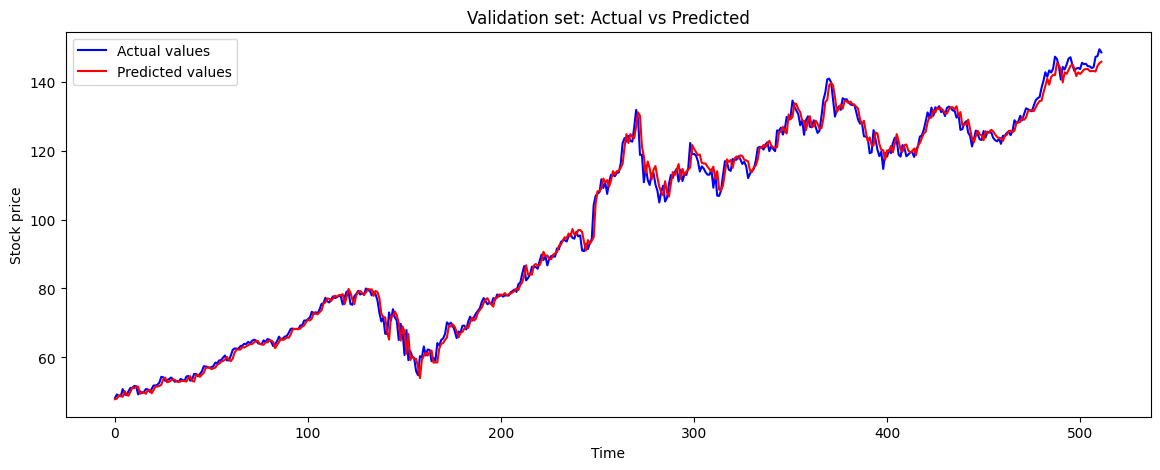

In [31]:
import matplotlib.pyplot as plt

def plot_predictions(preds, targets, scaler_target, title="Actual vs Predicted"):
    preds_inv = scaler_target.inverse_transform(preds.reshape(-1, 1))
    targets_inv = scaler_target.inverse_transform(targets.reshape(-1, 1))

    plt.figure(figsize=(14, 5))
    plt.plot(targets_inv, color='blue', label='Actual values')
    plt.plot(preds_inv, color='red', label='Predicted values')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock price')
    plt.legend()
    plt.show()

plot_predictions(preds, targets, scaler_target, title="Validation set: Actual vs Predicted")

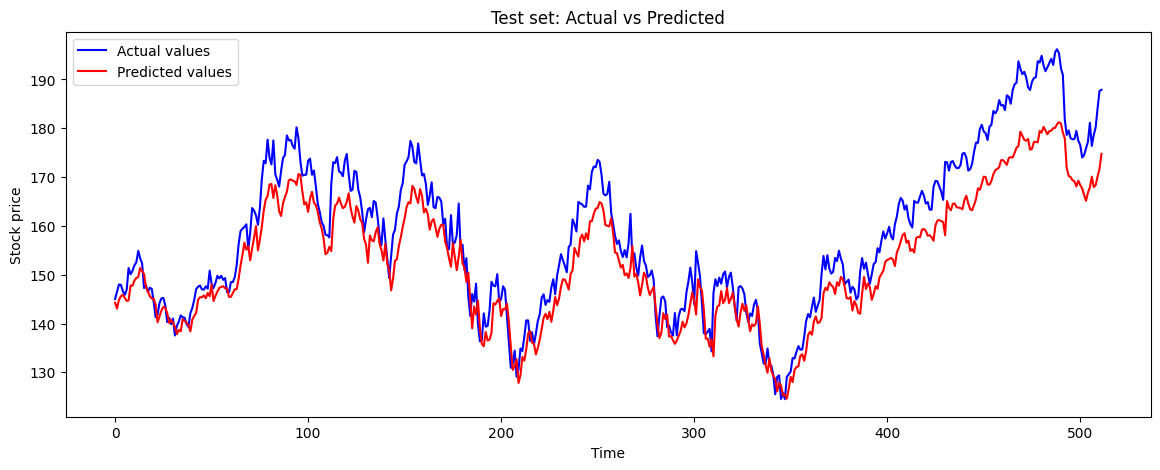

In [32]:
testloss, preds2, targets2 = validate(model, criterion, test_loader)

plot_predictions(preds2, targets2, scaler_target, title="Test set: Actual vs Predicted")

In [33]:
testloss

9.681286334991455